# Trabalho Final de Machine Learning

## Descrição do Trabalho

O objetivo principal desta análise é construir modelos de classificação para prever o status de aprovação de empréstimo (`loan_status`) com base nos atributos pessoais e relacionados ao empréstimo.

## Participantes

- Carlos Moura
- Clara Mesquita
- Davi Castro
- Marcelo Gonçalves
---

### Importação das Libs e setup

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df_loan = pd.read_csv('./datasets/loan_data.csv')
SEED = 13

sns.set_theme(style='dark')

df_loan.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


### Analise descritiva

In [4]:
df_loan.shape

(45000, 14)

In [5]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [6]:
df_loan.duplicated().sum()

np.int64(0)

In [7]:
df_loan.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


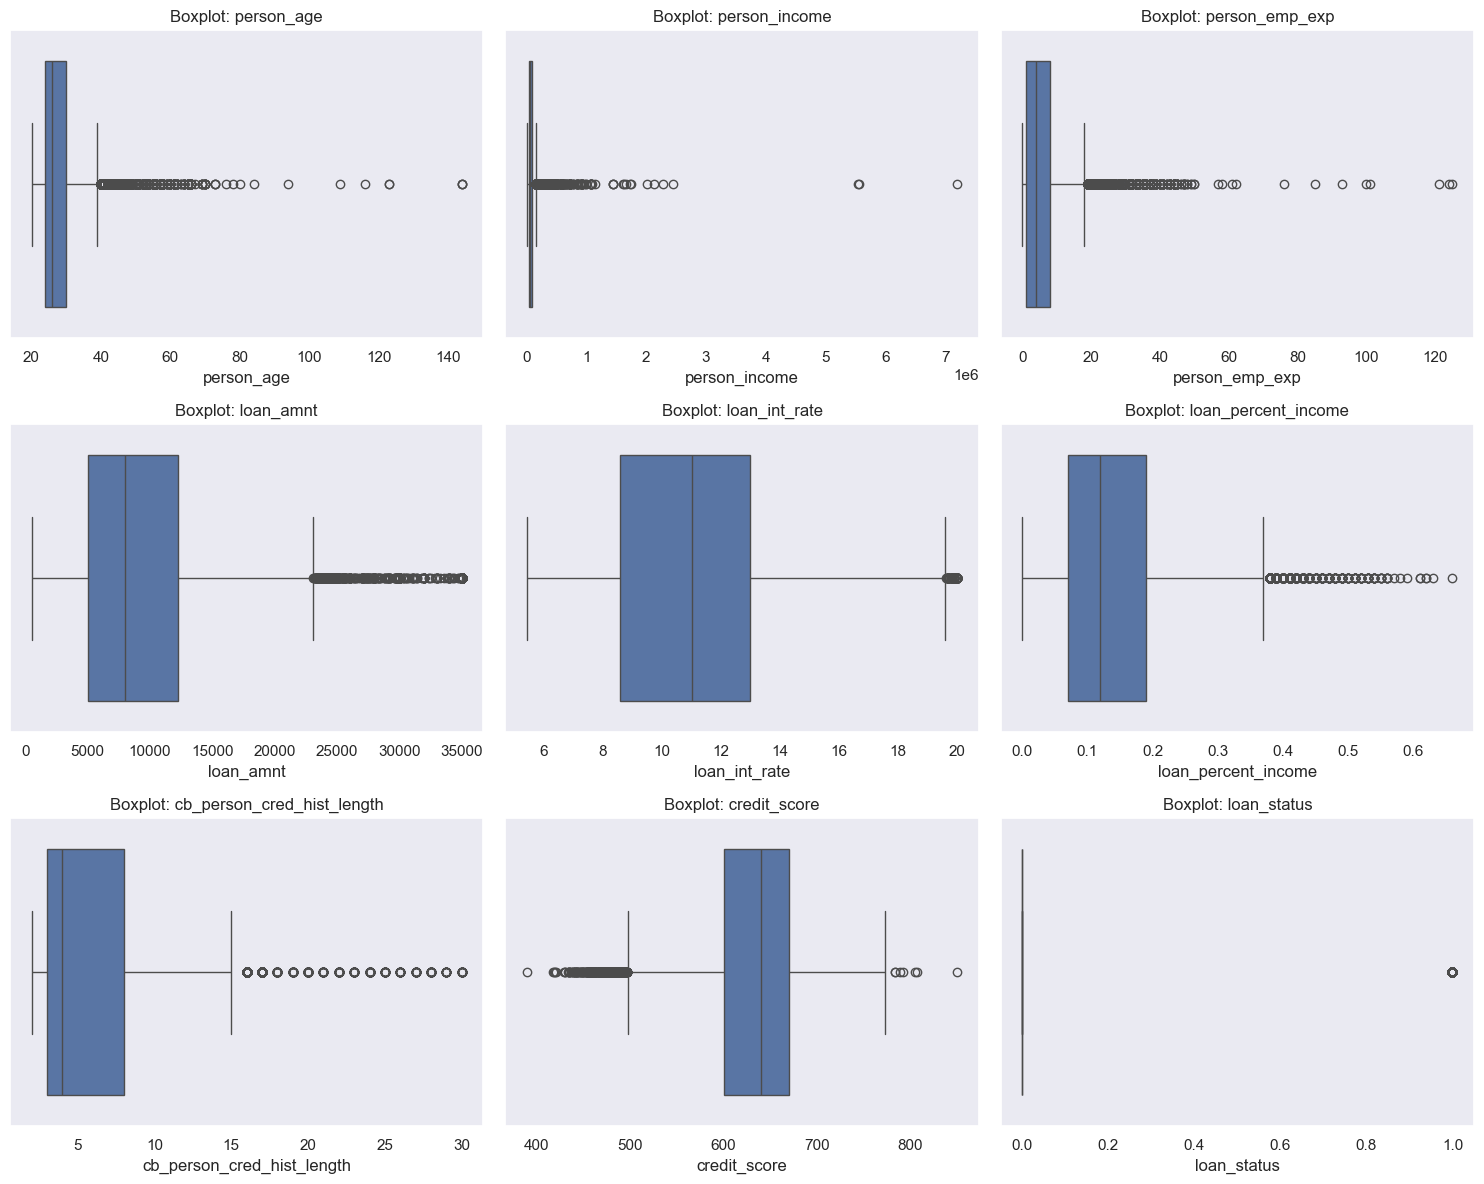

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = df_loan.select_dtypes(include=["number"]).columns

n_cols = 3  
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten() 


for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df_loan, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot: {col}', fontsize=12)

plt.tight_layout()
plt.show()


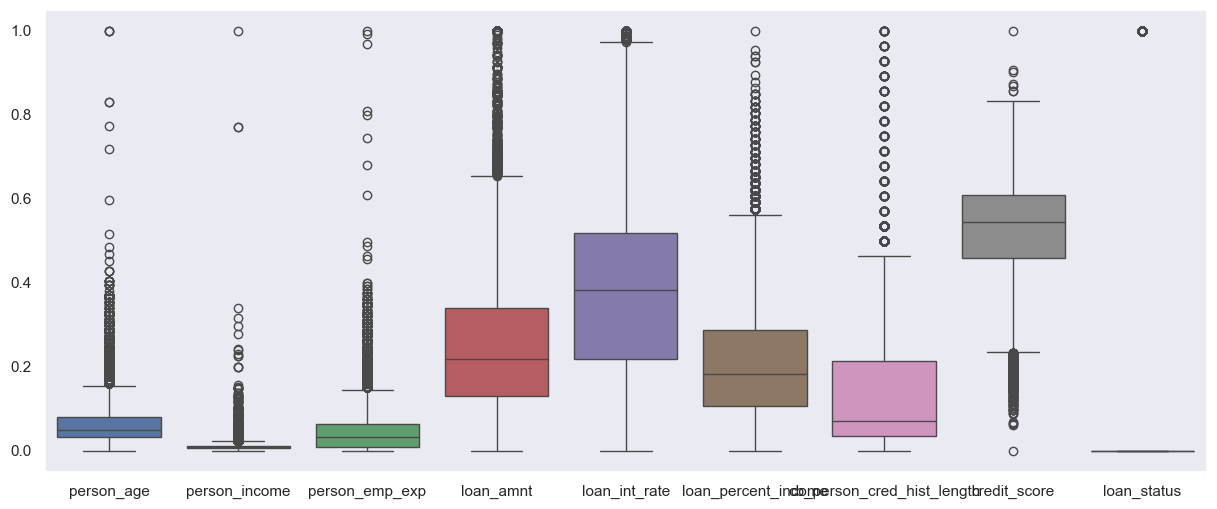

In [27]:
from sklearn.preprocessing import MinMaxScaler

plt.figure(figsize=(15,6))
numbers_columns = df_loan.select_dtypes(include=['number'])
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(numbers_columns), columns=numbers_columns.columns)
sns.boxplot(data=df_normalized)
plt.show()

In [ ]:
df_loan['person_age'].value_counts()

person_age
23.0     5254
24.0     5138
25.0     4507
22.0     4236
26.0     3659
27.0     3095
28.0     2728
29.0     2455
30.0     2021
31.0     1645
32.0     1403
21.0     1289
33.0     1240
34.0      980
35.0      847
36.0      740
37.0      666
38.0      503
39.0      389
40.0      349
41.0      303
42.0      247
43.0      215
44.0      177
45.0      135
46.0      114
47.0      112
48.0       93
49.0       59
50.0       56
51.0       46
52.0       42
53.0       35
55.0       24
54.0       24
58.0       20
56.0       20
57.0       17
20.0       17
60.0       16
61.0       12
66.0       11
65.0       10
62.0        7
70.0        7
64.0        7
59.0        6
69.0        5
73.0        3
144.0       3
63.0        3
123.0       2
78.0        1
94.0        1
80.0        1
84.0        1
76.0        1
67.0        1
116.0       1
109.0       1
Name: count, dtype: int64

In [36]:
df_loan['person_income'].value_counts()

person_income
8000.0     15
73011.0    10
36995.0     9
37020.0     8
60914.0     8
           ..
40925.0     1
35512.0     1
31924.0     1
56942.0     1
12438.0     1
Name: count, Length: 33989, dtype: int64

In [37]:
df_loan['person_emp_exp'].value_counts()

person_emp_exp
0     9566
2     4134
1     4061
3     3890
4     3524
      ... 
62       1
61       1
58       1
93       1
85       1
Name: count, Length: 63, dtype: int64

In [48]:
df_loan[df_loan['loan_int_rate'] >= 18]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
13,26.0,male,Master,130713.0,0,RENT,35000.0,EDUCATION,18.39,0.27,4.0,708,No,1
17,23.0,female,High School,111369.0,0,RENT,35000.0,MEDICAL,20.00,0.31,4.0,694,No,1
18,23.0,male,Bachelor,136628.0,0,RENT,35000.0,DEBTCONSOLIDATION,18.25,0.26,4.0,709,No,1
36,22.0,female,Bachelor,58868.0,0,RENT,30000.0,EDUCATION,18.39,0.51,2.0,606,No,1
43,23.0,male,High School,361547.0,0,OWN,24250.0,EDUCATION,19.41,0.07,2.0,637,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44902,27.0,male,Bachelor,56272.0,4,RENT,5000.0,EDUCATION,19.04,0.09,4.0,571,No,1
44920,26.0,female,Associate,53574.0,6,RENT,12120.0,EDUCATION,19.62,0.23,3.0,603,No,1
44933,32.0,female,Master,86519.0,10,RENT,2798.0,DEBTCONSOLIDATION,19.11,0.03,10.0,674,No,1
44965,31.0,male,Associate,100407.0,9,RENT,17783.0,VENTURE,19.80,0.18,8.0,655,No,1


Os outliers do **loan_int_rate** (Taxa de juros do emprestimo) e **loan_amount** (Valor do emprestimo solicitado) estão em coerencia. O maiores valores com as maiores taxas. Não outliers

In [56]:
df_loan[df_loan['loan_percent_income'] > 0.5][['loan_percent_income', 'person_income', 'loan_amnt']].head()

,loan_percent_income,person_income,loan_amnt
4,0.53,66135.0,35000.0
36,0.51,58868.0,30000.0
460,0.57,22684.0,13000.0
493,0.52,43042.0,22250.0
535,0.55,38473.0,21250.0


## Conclusão da Análise Descritiva

A base de dados analisada não apresenta valores duplicados, nulos ou tipos de dados indevidos nas suas features. A estrutura está consistente e pronta para análises mais profundas. O único ponto identificado foram os **outliers**, que foram avaliados detalhadamente e, em sua maioria, refletem cenários plausíveis e esperados, exceto por casos específicos como em `person_emp_exp`, onde ajustes foram realizados para garantir a consistência dos dados.

1. **Outliers Possivelmente Reais**  
   Algumas variáveis apresentaram outliers no boxplot, mas, devido à distribuição dos dados, os valores são plausíveis e podem refletir casos reais:
   - **`person_age`** (Idade): Outliers podem representar pessoas mais idosas, embora incomuns, não são descartáveis.
   - **`person_income`** (Renda): Valores altos indicam pessoas com rendas significativamente maiores.
   - **`credit_score`** (Pontuação de crédito): Outliers podem representar pontuações incomuns, mas reais.
   - **`cb_person_cred_hist_length`** (Histórico de crédito): Outliers de históricos longos são plausíveis.

2. **Outliers Coerentes com a Realidade**  
   - **`loan_int_rate`** (Taxa de juros do empréstimo): Taxas mais altas estão associadas a valores mais elevados, indicando coerência.
   - **`loan_amount`** (Valor do empréstimo): Valores mais altos refletem solicitações de maior risco ou alto poder aquisitivo.

3. **Outliers Estatísticos em `loan_percent_income`**  
   Os valores de `loan_percent_income` acima de **0.4** foram identificados como outliers estatísticos. Após verificação:
   - Todos os valores são coerentes.
   - Esses casos refletem cenários esperados, considerando que pessoas com rendas menores frequentemente comprometem proporções maiores da sua renda com empréstimos.

4. **Outliers Reais Identificados**  
   - **`person_emp_exp`** (Anos de experiência profissional): Valores acima de **35 anos** serão considerados outliers reais, uma vez que excedem o tempo típico necessário para aposentadoria no Brasil (35 anos). Esses valores podem representar inconsistências ou casos raros.


In [57]:

df_loan['person_emp_exp'] = df_loan['person_emp_exp'].apply(lambda x: 35 if x > 35 else x)


<Axes: xlabel='person_emp_exp'>

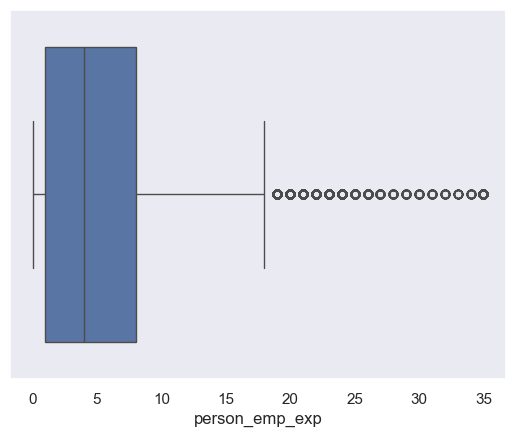

In [60]:
sns.boxplot(data=df_loan, x='person_emp_exp')

In [63]:
variaveis_categoricas = df_loan.select_dtypes(include=['object']).columns
print(f'Variáveis categóricas encontradas: {variaveis_categoricas}')

df_dummies = pd.get_dummies(df_loan, columns=variaveis_categoricas, drop_first=True)

# Passo 4: Verificar o resultado
df_dummies.head()

Variáveis categóricas encontradas: Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object')


,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1,False,...,True,False,False,True,False,False,False,True,False,False
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,False,...,False,False,True,False,True,False,False,False,False,True
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,False,...,False,False,False,False,False,False,True,False,False,False
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1,False,...,False,False,False,True,False,False,True,False,False,False
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1,True,...,True,False,False,True,False,False,True,False,False,False


### Utlização do modelo 

In [65]:
! pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   -- ------------------------------------- 8.1/124.9 MB 46.0 MB/s eta 0:00:03
   ------ --------------------------------- 19.1/124.9 MB 48.4 MB/s eta 0:00:03
   --------- ------------------------------ 28.8/124.9 MB 48.2 MB/s eta 0:00:02
   ------------ --------------------------- 38.8/124.9 MB 47.5 MB/s eta 0:00:02
   --------------- ------------------------ 49.8/124.9 MB 48.8 MB/s eta 0:00:02
   ------------------ --------------------- 58.2/124.9 MB 46.9 MB/s eta 0:00:02
   ---------------------- ----------------- 68.9/124.9 MB 47.3 MB/s eta 0:00:02
   ------------------------- -------------- 78.9/124.9 MB 47.5 MB/s eta 0:00:01
   ---------------------------- ----------- 89.9/124.9 MB 47.8 MB/s eta 0:00:01
   -------------------------------- ------- 100.1/124.9 MB 47.7 MB/s eta 0:00:01
   ----------------------------------- ---- 109.6/124.9 MB 47.3 MB/s eta 0:00:01
   -------------------------------------- - 118.


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [75]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
 
# Carregar o dataset
file_path = './datasets/processed_loan_data.csv'
data = pd.read_csv(file_path)
 
# Exibir as primeiras linhas para entender a estrutura do dataset
data.head()


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [76]:

# Pré-processamento do dataset
# Convertendo variáveis categóricas em numéricas usando variáveis dummy
data = pd.get_dummies(data, drop_first=True)
 
# Dividindo os dados em variáveis de características e variável alvo
X = data.drop('loan_status', axis=1)
y = data['loan_status']

# Padronizando os dados para melhorar a performance dos modelos
scaler = StandardScaler()
X = scaler.fit_transform(X)
 
data.head()
 

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1,False,...,True,False,False,True,False,False,False,True,False,False
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,False,...,False,False,True,False,True,False,False,False,False,True
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,False,...,False,False,False,False,False,False,True,False,False,False
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1,False,...,False,False,False,True,False,False,True,False,False,False
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1,True,...,True,False,False,True,False,False,True,False,False,False


In [77]:
# Dividindo o dataset em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Tarefa 1: Treinando Diferentes Modelos
 
# 1a: Regressão Logística - Ajuste de Hiperparâmetros
log_reg = LogisticRegression(max_iter=1000, random_state=42)
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)
 
best_lr = grid_search_lr.best_estimator_
print("Melhores Parâmetros para Regressão Logística:", grid_search_lr.best_params_)

Melhores Parâmetros para Regressão Logística: {'C': 0.01}


In [ ]:
# 1b: Random Forest - Ajuste de Hiperparâmetros
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
 
best_rf = grid_search_rf.best_estimator_
print("Melhores Parâmetros para Random Forest:", grid_search_rf.best_params_)

In [ ]:
# 1c: XGBoost - Ajuste de Hiperparâmetros
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train, y_train)
 
best_xgb = grid_search_xgb.best_estimator_
print("Melhores Parâmetros para XGBoost:", grid_search_xgb.best_params_)

In [ ]:
 
# Tarefa 2: Definir Ponto de Corte
# Definindo uma função para avaliar métricas em diferentes pontos de corte
def evaluate_cutoff(model, X, y, cutoff=0.5):
    probabilities = model.predict_proba(X)[:, 1]
    predictions = (probabilities > cutoff).astype(int)
    return {
        'accuracy': accuracy_score(y, predictions),
        'precision': precision_score(y, predictions),
        'recall': recall_score(y, predictions),
        'f1_score': f1_score(y, predictions)
    }
 
# Definir ponto de corte para Regressão Logística e otimizar o F1-score
best_cutoff = 0.5
best_f1 = 0
for cutoff in np.arange(0.1, 1.0, 0.05):
    metrics = evaluate_cutoff(best_lr, X_test, y_test, cutoff)
    if metrics['f1_score'] > best_f1:
        best_f1 = metrics['f1_score']
        best_cutoff = cutoff
 
print(f"Melhor Ponto de Corte para Regressão Logística: {best_cutoff} com F1-score: {best_f1}")
 

In [ ]:
# Tarefa 3: Avaliar Performance dos Modelos
models = {'Regressão Logística': best_lr, 'Random Forest': best_rf, 'XGBoost': best_xgb}
 
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\nDesempenho do {model_name}:")
    print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precisão: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")

In [ ]:
# Tarefa 4: Comparar Resultados
accuracies = {model_name: accuracy_score(y_test, model.predict(X_test)) for model_name, model in models.items()}
print("\nAcurácia dos Modelos:")
for model_name, accuracy in accuracies.items():
    print(f"{model_name}: {accuracy:.2f}")

In [ ]:
# Tarefa 5: Escolher o Melhor Modelo
best_model_name = max(accuracies, key=accuracies.get)
print(f"\nMelhor Modelo: {best_model_name}")

In [ ]:
 
# Tarefa 6: Importância das Features
# Importância das Features para Random Forest e XGBoost
for model_name, model in models.items():
    if model_name in ['Random Forest', 'XGBoost']:
        importances = model.feature_importances_
        feature_names = X.columns
        indices = np.argsort(importances)[::-1]
        plt.figure()
        plt.title(f"Importância das Features - {model_name}")
        plt.bar(range(X.shape[1]), importances[indices], align="center")
        plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
        plt.tight_layout()
        plt.show()